In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scipy.stats as scs
import random
import math

%matplotlib inline

In [2]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import json

In [3]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_json('data/data.json')

In [5]:
df.shape

(14337, 44)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [7]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [7]:
df.fb_published[:5]

0    0
1    0
2    0
3    0
4    1
Name: fb_published, dtype: int64

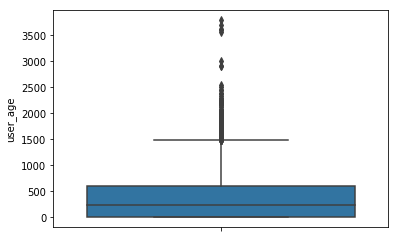

In [11]:
sns.boxplot(df.user_age, orient = 'v')

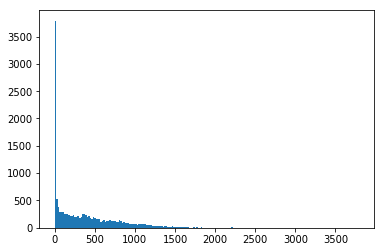

In [66]:
h = plt.hist(df.user_age, bins = 200)

In [13]:
df.previous_payouts[:5]

0                                                   []
1    [{'name': 'RUF', 'created': '2010-10-01 01:10:...
2    [{'name': 'Danielle Severn', 'created': '2010-...
3    [{'name': '', 'created': '2010-11-09 01:10:15'...
4    [{'name': 'Arts and Business Council or Greate...
Name: previous_payouts, dtype: object

In [15]:
df.ticket_types[:5]

0    [{'event_id': 527017, 'cost': 25.0, 'availabil...
1    [{'event_id': 786878, 'cost': 35.0, 'availabil...
2    [{'event_id': 787337, 'cost': 93.51, 'availabi...
3    [{'event_id': 885645, 'cost': 25.0, 'availabil...
4    [{'event_id': 1114349, 'cost': 150.0, 'availab...
Name: ticket_types, dtype: object

In [19]:
df.user_type.value_counts()

3      7520
1      3738
4      3017
5        59
103       2
2         1
Name: user_type, dtype: int64

In [24]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [68]:
df['target'] = df.acct_type.copy()

In [69]:
list(df.target.unique())

['fraudster_event',
 'premium',
 'spammer_warn',
 'fraudster',
 'spammer_limited',
 'spammer_noinvite',
 'locked',
 'tos_lock',
 'tos_warn',
 'fraudster_att',
 'spammer_web',
 'spammer']

In [71]:
df.target.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [75]:
df.replace(to_replace= {'target': ['fraudster_event', 'fraudster', 'fraudster_att']}, 
           value = {'target':[1,1,1]}, inplace=True)

In [74]:
df.target.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [76]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [8]:
## Targets, Dropping acct_type 
fraud_accts = set(['fraudster_event', 'fraudster', 'fraudster_att'])
new_df = df.copy()
new_df['fraud'] = df['acct_type'].apply(lambda x: 1 if x in fraud_accts else 0)
new_df.drop('acct_type', axis=1, inplace=True)

## Age Dummy (3*)
new_df['age_dummy'] = new_df['user_age'].apply(lambda x: 1 if x > 0 else 0)

## Event Diff (3*)
new_df['eventdiff'] = new_df['event_published'] - new_df['event_end']

## Payout Diff (3*)
new_df['payoutdiff'] = new_df['approx_payout_date'] - new_df['event_created']

## Body Length (1*)
## Unchanged

## Channels (0*)
## Categorical, not sure what this variable is

In [9]:
X = new_df[['user_age', 'age_dummy']].values
y = new_df.fraud.values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[-7.35595171e-05 -1.81577764e-01]


In [10]:
pickle.dump(model, open('linreg.p', 'wb'))

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
X = new_df[['user_age', 'age_dummy']].values
y = new_df.fraud.values

X_train, X_test, y_train, y_test = train_test_split(X, y)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logmodel.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [15]:
pp = logmodel.predict_proba(X_test)
pp[0]

array([0.97227542, 0.02772458])

In [19]:
pp

array([[9.72275415e-01, 2.77245846e-02],
       [9.99662481e-01, 3.37519136e-04],
       [8.88803357e-01, 1.11196643e-01],
       ...,
       [9.57779861e-01, 4.22201388e-02],
       [7.27863210e-01, 2.72136790e-01],
       [9.87938372e-01, 1.20616278e-02]])

In [17]:
pp[:,0].mean()

0.9114360461257812

In [18]:
pp[:,1].mean()

0.08856395387421885

In [20]:
logmodel.classes_

array([0, 1], dtype=int64)

In [109]:
countries = df.country.value_counts().reset_index()

In [23]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client['fraud']
table = db['events']

In [26]:
l50 = table.find(limit = 50)

In [34]:
l50[0]

{'_id': ObjectId('5c8ac87c0a0db39dfee221c0'),
 'acct_type': 'fraudster_event',
 'approx_payout_date': 1266062400,
 'body_length': 3852,
 'channels': 5,
 'country': 'US',
 'currency': 'USD',
 'delivery_method': 0.0,
 'description': '<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p

In [30]:
table.find({'user_age': 50})